In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("WeatherAUS_model.csv")
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,RainTodayNo,RainTodayYes
0,2.0,13.4,22.9,0.6,14.0,44.0,14.0,15.0,20.0,24.0,71.0,22.0,0.707317,0.706896,16.9,21.8,0,1.0,0.0
1,2.0,7.4,25.1,0.0,15.0,44.0,6.0,16.0,4.0,22.0,44.0,25.0,0.708087,0.706125,17.2,24.3,0,1.0,0.0
2,2.0,12.9,25.7,0.0,16.0,46.0,14.0,16.0,19.0,26.0,38.0,30.0,0.706721,0.707492,21.0,23.2,0,1.0,0.0
3,2.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,0.708776,0.705433,18.1,26.5,0,1.0,0.0
4,2.0,17.5,32.3,1.0,14.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,0.708788,0.705422,17.8,29.7,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,41.0,3.5,21.8,0.0,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,0.708315,0.705896,9.4,20.9,0,1.0,0.0
140783,41.0,2.8,23.4,0.0,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,0.708592,0.705618,10.1,22.4,0,1.0,0.0
140784,41.0,3.6,25.3,0.0,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,0.708628,0.705582,10.9,24.5,0,1.0,0.0
140785,41.0,5.4,26.9,0.0,3.0,37.0,9.0,15.0,9.0,9.0,53.0,24.0,0.708563,0.705648,12.5,26.1,0,1.0,0.0


In [19]:
from sklearn.model_selection import train_test_split
Y = df['RainTomorrow'] #правильно
X = df.drop(columns=['RainTomorrow']) #предугадано
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [21]:
dtc = dtc.fit(x_train,y_train)

In [22]:
dtc_plot = DecisionTreeClassifier(max_depth=2,min_samples_leaf=4,max_leaf_nodes=150)
dtc_plot = dtc_plot.fit(x_train.iloc[::100],y_train.iloc[::100])

[Text(0.5, 0.8333333333333334, 'x[11] <= 67.5\ngini = 0.344\nsamples = 1127\nvalue = [878, 249]'),
 Text(0.25, 0.5, 'x[5] <= 53.0\ngini = 0.228\nsamples = 877\nvalue = [762, 115]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.161\nsamples = 749\nvalue = [683, 66]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.473\nsamples = 128\nvalue = [79, 49]'),
 Text(0.75, 0.5, 'x[11] <= 85.5\ngini = 0.497\nsamples = 250\nvalue = [116, 134]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.487\nsamples = 172\nvalue = [100, 72]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.326\nsamples = 78\nvalue = [16, 62]')]

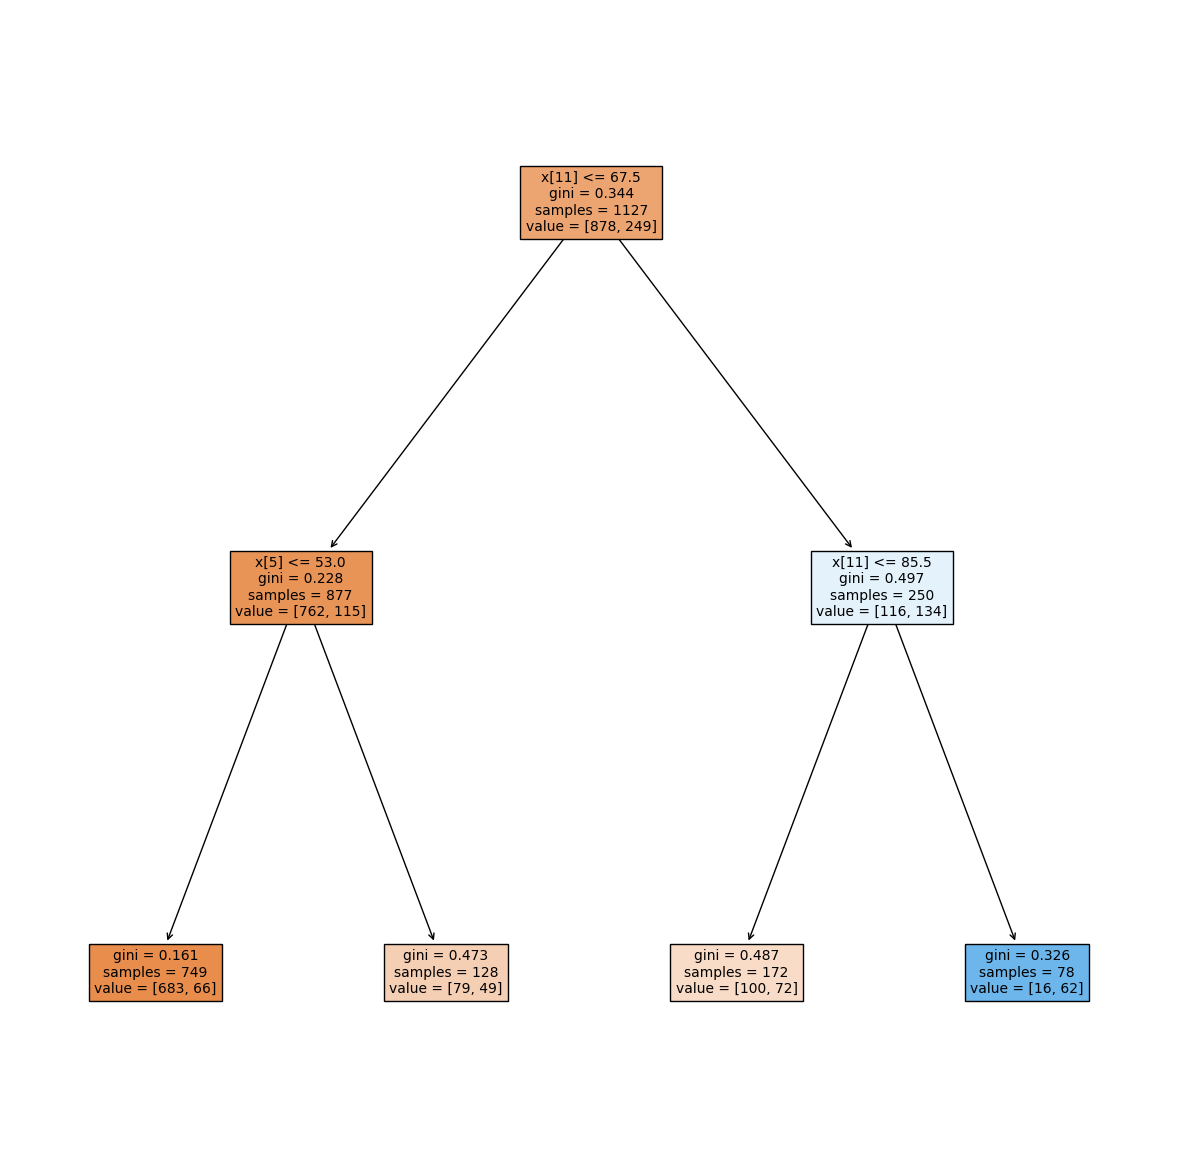

In [23]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dtc_plot,filled=tree,fontsize=10)

In [24]:
from sklearn import metrics
y_predict = dtc.predict(x_test)

In [25]:
con_mat = metrics.confusion_matrix(y_test,y_predict)
con_mat

array([[18701,  3196],
       [ 2997,  3264]], dtype=int64)

Text(50.722222222222214, 0.5, 'real')

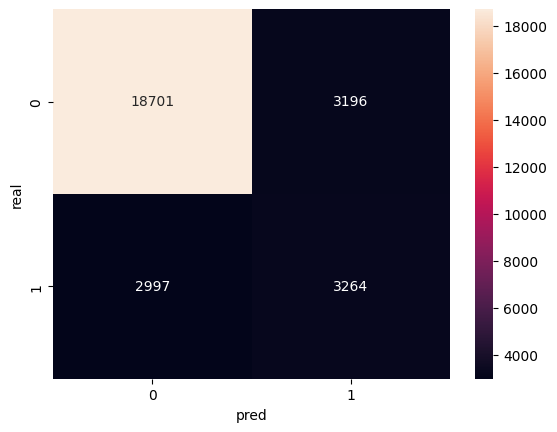

In [26]:
sns.heatmap(con_mat,annot=True,fmt="d")
plt.xlabel('pred')
plt.ylabel('real')

In [27]:
print('Tochono',metrics.accuracy_score(y_test,y_predict))

Tochono 0.7800625044392357


In [28]:
print('chystvitel',metrics.recall_score(y_test,y_predict))

chystvitel 0.5213224724484906


In [29]:
print('akyratno',metrics.precision_score(y_test,y_predict))

akyratno 0.5052631578947369


In [30]:
print('Tochono',metrics.f1_score(y_test,y_predict))

Tochono 0.5131672038361764
